In [1]:
import os
import time
import math
import sys
import warnings
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
sys.path.append("../")
from deepneuroan.data_generator import DataGenerator
from deepneuroan.models import ChannelwiseConv3D
from deepneuroan.generate_train_data import generate_random_quaternions, generate_random_transformations

E1213 14:44:57.977617 140124859918144 due.py:63] Failed to import duecredit due to No module named 'duecredit'


In [29]:
p_outliers=0.05
n_vol=405
n_transfs=10000
range_rad=160*np.pi/180
range_mm=3
seed=0

np.random.seed(seed)
rnd = np.random.rand(n_vol, n_transfs, 3)
Q = generate_random_quaternions(rnd, range_rad, p_outliers, method="uniform")
# Q, t = generate_random_transformations(n_transfs, n_vol, p_outliers, range_rad, range_mm, seed)

In [38]:
angles = 2*np.arccos(Q[0,0,0])
angles

4.571814684521853

In [39]:
angles = 2*np.arcsin(np.linalg.norm(Q[0,0,:]))
angles

3.141592653589793

358.2428825656999
mean 180.002523
percentile 95% 287.311027


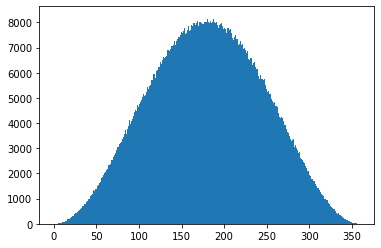

In [33]:
#angles
angles = 2*np.arccos(Q[:,:,0])
angles = 2*np.arcsin()
print(np.max(angles*180/math.pi))
print("mean %f" %(np.mean(angles.flatten())*180/math.pi))
print("percentile 95%% %f" %np.percentile(angles.flatten()*180/math.pi, 95))
plt.hist(angles.flatten()*180/math.pi, 1000)
plt.show()

0.9975830339318321
mean 0.000981
percentile 95% 0.807712


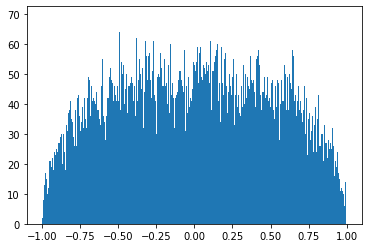

In [24]:
vec = Q[:,:,3].flatten()
print(np.max(vec))
print("mean %f" %(np.mean(vec)))
print("percentile 95%% %f" %np.percentile(vec, 95))
plt.hist(vec, 1000)
plt.show()

In [30]:
norms = []
for i in range(q.shape[0]):
    norms += [np.linalg.norm(q[i,], axis=1)]
norms

[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]

In [31]:
qo = q[0,0,:]

In [32]:
coeff_inverse = 1/(qo[0]**2 + qo[1]**2 + qo[2]**2 + qo[3]**2)

In [33]:
qinv = coeff_inverse*np.array([qo[0], -qo[1], -qo[2], -qo[3]])

In [34]:
qinv

array([-0.65570124,  0.14574766,  0.44578275,  0.59168509])

In [35]:
def q_multiply(q0, q1):
    w0, x0, y0, z0 = q0
    w1, x1, y1, z1 = q1
    q = [-x1 * x0 - y1 * y0 - z1 * z0 + w1 * w0
          , x1 * w0 + y1 * z0 - z1 * y0 + w1 * x0
          , -x1 * z0 + y1 * w0 + z1 * x0 + w1 * y0
          ,  x1 * y0 - y1 * x0 + z1 * w0 + w1 * z0]
    return q

In [36]:
q_multiply(qo, qinv)[0]

1.0